In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from fibheap import FibonacciHeap as FibHeap
from peel_by_motif import *
from utils import *

import random
import pandas as pd
from datetime import datetime
from compare_algs.greedy_algorithms import *
import graph_tool.all as gt

In [16]:
plt.rcParams.update({'font.size': 14})

# Benford distribution

In [17]:
import math



benford = []
xs = [i for i in range(1,10)]
for i in range(9):
    benford.append(math.log10(1+1/(i+1)))
    
# sum(benford)

def get_slot_ind(v, dist=benford):
    cul = 0
    for i in range(len(dist)):
        cul += dist[i]
        if v<cul:
            return i
    return None

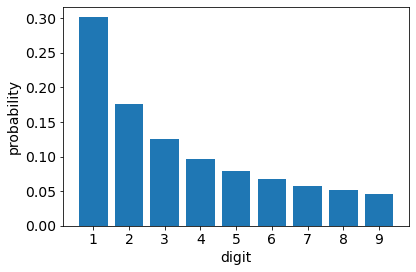

In [20]:
plt.bar([str(i) for i in range(1,10)], benford)
plt.xlabel('digit')
plt.ylabel('probability')
plt.tight_layout()
plt.savefig('figs/synthetic/benford.png')
plt.show()

In [4]:
def link_intra(n_list, p, weight=0):
    edgelist = []
    for i in n_list:
        for j in n_list:
            if i!=j and random.uniform(0,1)<p:
                if weight==0:
                    edgelist.append((i,j,get_slot_ind(random.uniform(0,1)) + 1))
                else:
                    edgelist.append((i,j,weight))
    return edgelist

def link_inter(u_list, v_list, p, weight=0):
    edgelist = []
    for i in u_list:
        for j in v_list:
            if i!=j and random.uniform(0,1)<p:
                if weight==0:
                    edgelist.append((i,j,get_slot_ind(random.uniform(0,1)) + 1))
                else:
                    edgelist.append((i,j,weight))
    return edgelist

In [13]:
def plot_heatmap(ps, runtimes, k, savefig=True):
    fig, ax = plt.subplots()
    runtimes = [[round(i, 2) for i in l] for l in runtimes]
    im = ax.imshow(runtimes)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(ps)))
    ax.set_yticks(np.arange(len(ps)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(ps)
    ax.set_yticklabels(ps)

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ps)):
        for j in range(len(ps)):
            text = ax.text(j, i, runtimes[i][j],
                           ha="center", va="center", color="r")

    plt.ylabel('Benign clique size')
    plt.xlabel('Anomalous clique size')
    # ax.set_title("running time in sec")
    fig.tight_layout()
    if savefig:
        plt.savefig('figs/synthetic/heatmap_inject='+str(k)+'.png')
    plt.show()

# ranging the size of normal/anomalous cliques. Our alg can constantly find anomalies even when the clique size is small. Node's Chi-Square statistics are plotted as well

Normal clique size 10 , anomaly clique size: 10


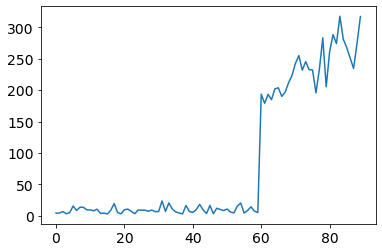

Normal clique size 10 , anomaly clique size: 15


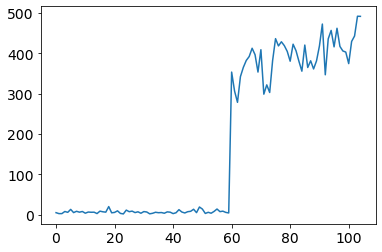

Normal clique size 10 , anomaly clique size: 20


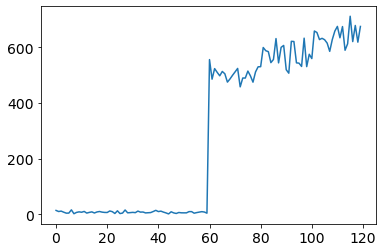

Normal clique size 10 , anomaly clique size: 25


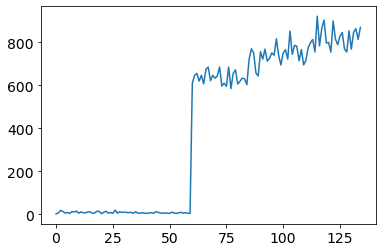

Normal clique size 15 , anomaly clique size: 10


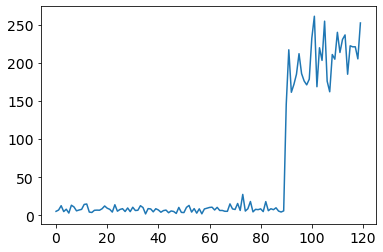

Normal clique size 15 , anomaly clique size: 15


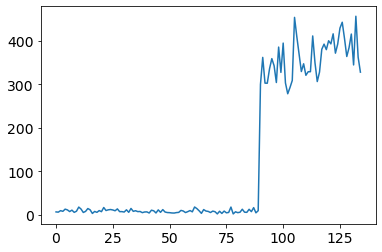

Normal clique size 15 , anomaly clique size: 20


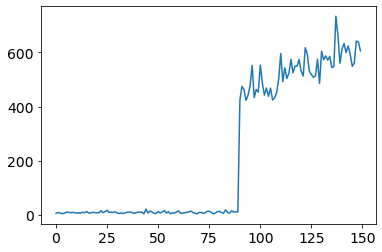

Normal clique size 15 , anomaly clique size: 25


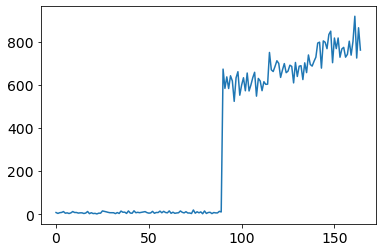

Normal clique size 20 , anomaly clique size: 10


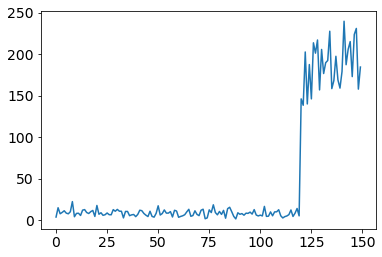

Normal clique size 20 , anomaly clique size: 15


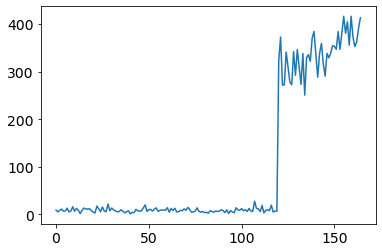

Normal clique size 20 , anomaly clique size: 20


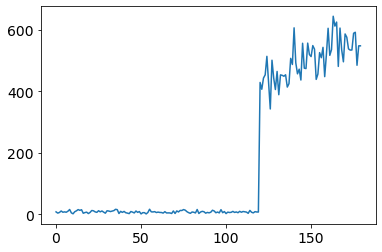

Normal clique size 20 , anomaly clique size: 25


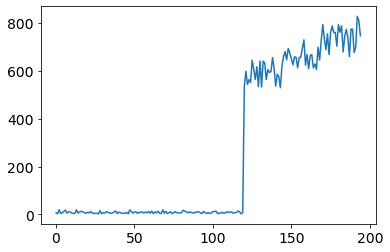

Normal clique size 25 , anomaly clique size: 10


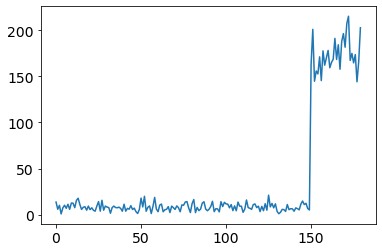

Normal clique size 25 , anomaly clique size: 15


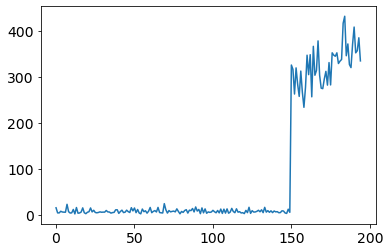

Normal clique size 25 , anomaly clique size: 20


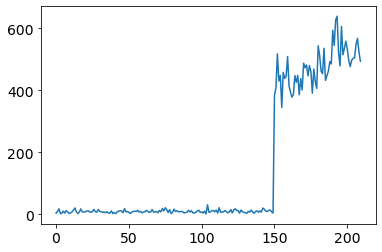

Normal clique size 25 , anomaly clique size: 25


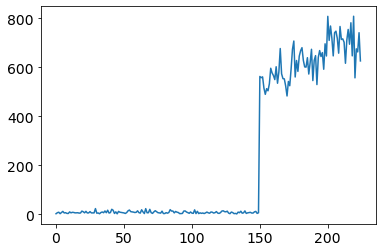

Normal clique size 10 , anomaly clique size: 10


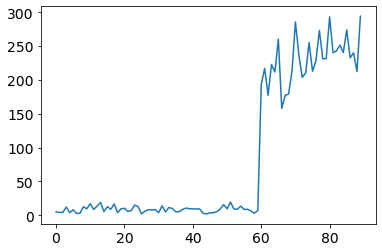

Normal clique size 10 , anomaly clique size: 15


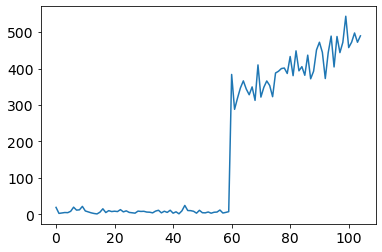

Normal clique size 10 , anomaly clique size: 20


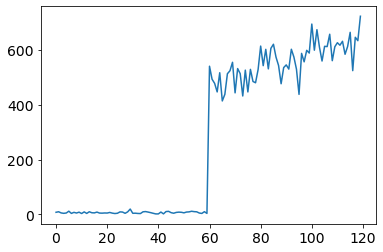

Normal clique size 10 , anomaly clique size: 25


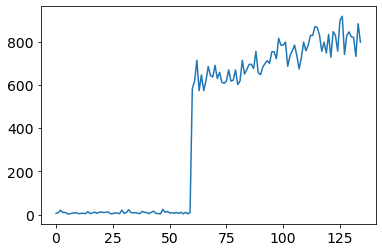

Normal clique size 15 , anomaly clique size: 10


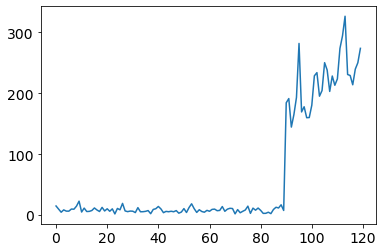

Normal clique size 15 , anomaly clique size: 15


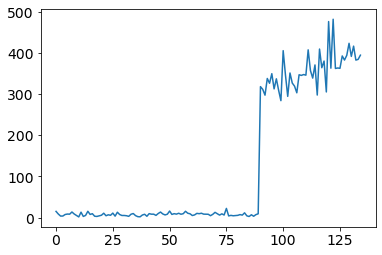

Normal clique size 15 , anomaly clique size: 20


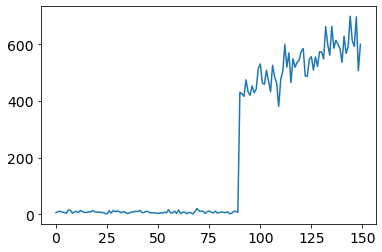

Normal clique size 15 , anomaly clique size: 25


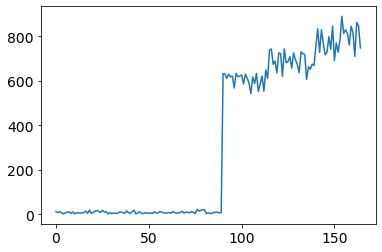

Normal clique size 20 , anomaly clique size: 10


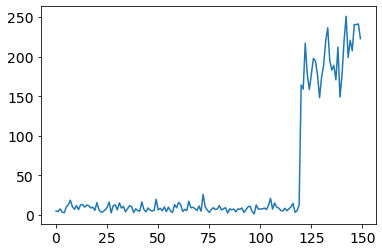

Normal clique size 20 , anomaly clique size: 15


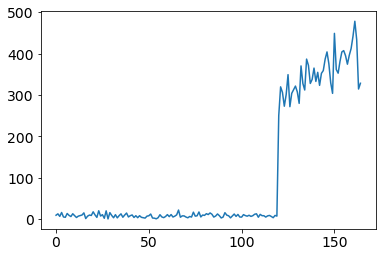

Normal clique size 20 , anomaly clique size: 20


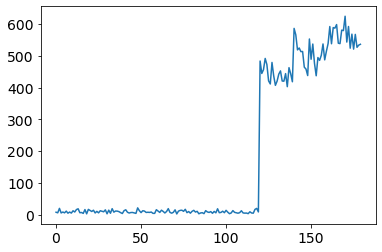

Normal clique size 20 , anomaly clique size: 25


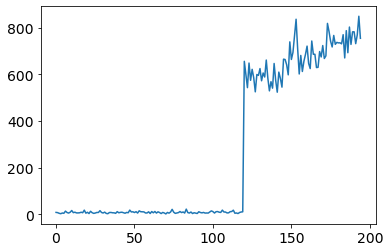

Normal clique size 25 , anomaly clique size: 10


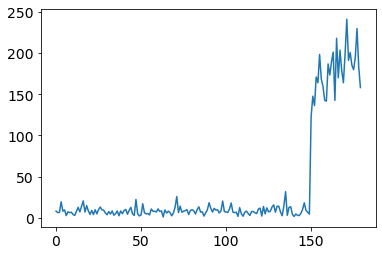

Normal clique size 25 , anomaly clique size: 15


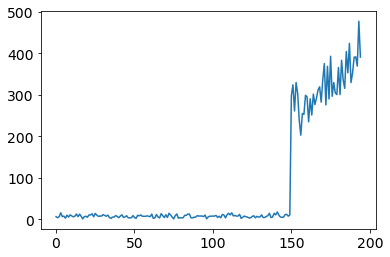

Normal clique size 25 , anomaly clique size: 20


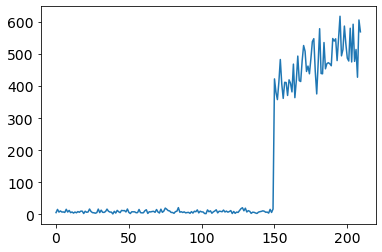

Normal clique size 25 , anomaly clique size: 25


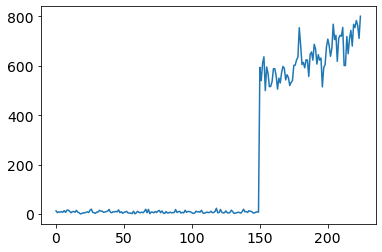

Normal clique size 10 , anomaly clique size: 10


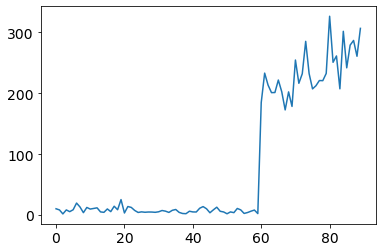

Normal clique size 10 , anomaly clique size: 15


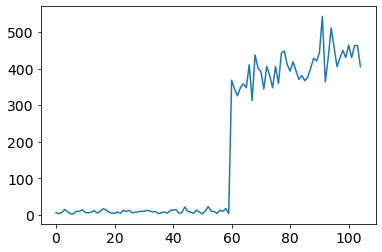

Normal clique size 10 , anomaly clique size: 20


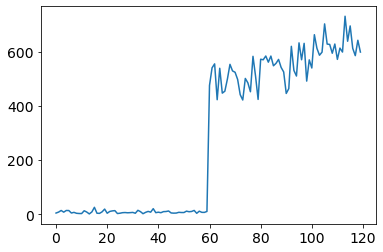

Normal clique size 10 , anomaly clique size: 25


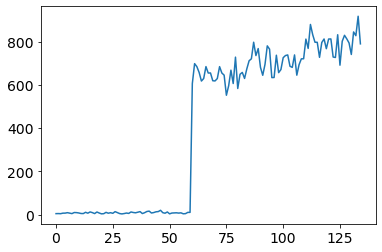

Normal clique size 15 , anomaly clique size: 10


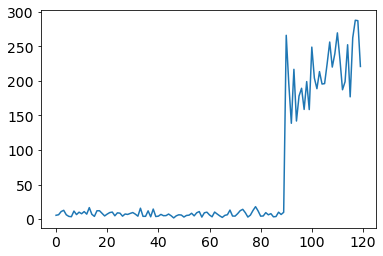

Normal clique size 15 , anomaly clique size: 15


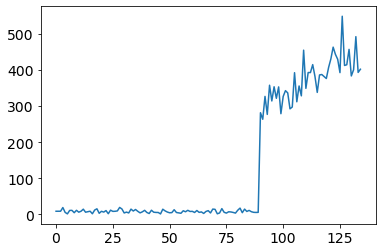

Normal clique size 15 , anomaly clique size: 20


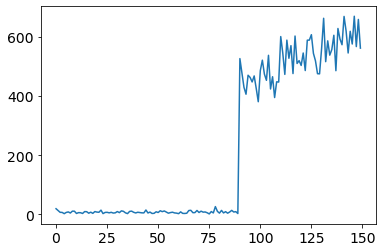

Normal clique size 15 , anomaly clique size: 25


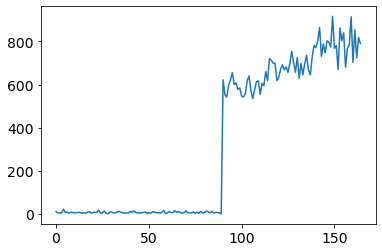

Normal clique size 20 , anomaly clique size: 10


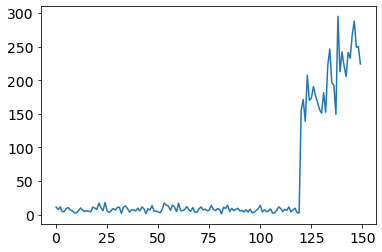

Normal clique size 20 , anomaly clique size: 15


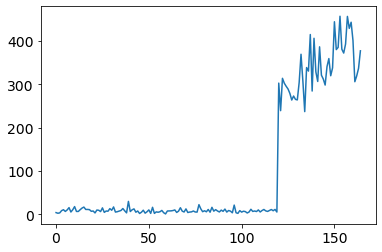

Normal clique size 20 , anomaly clique size: 20


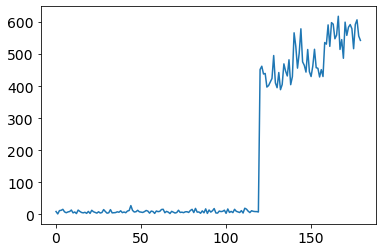

Normal clique size 20 , anomaly clique size: 25


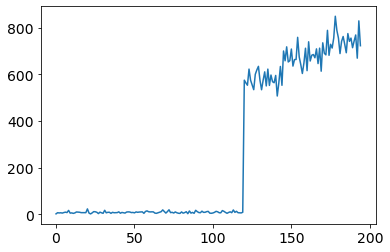

Normal clique size 25 , anomaly clique size: 10


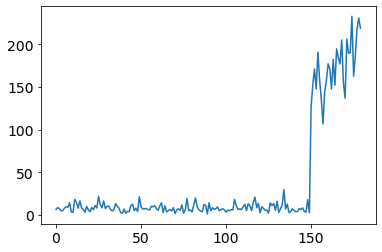

Normal clique size 25 , anomaly clique size: 15


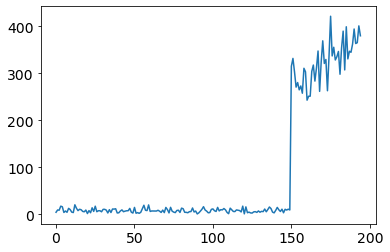

Normal clique size 25 , anomaly clique size: 20


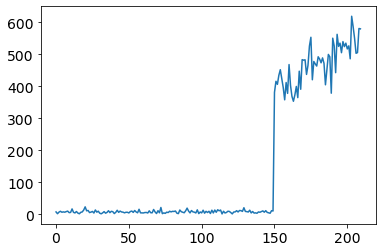

Normal clique size 25 , anomaly clique size: 25


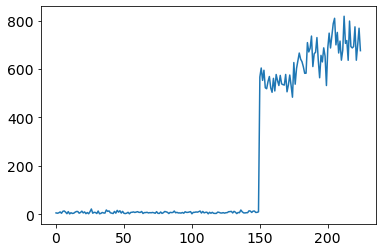

In [42]:
# for i in range(0, 6):
avg_flags = []
for times in range(3):
    all_flags = []
    for benign_size in [10, 15, 20, 25]:
        part_flags = []
    #     benign_size in [] = 22-2*i
        for malici_size in [10, 15, 20, 25]:
    #     malici_size = 4+4*i
            print('Normal clique size', benign_size, ', anomaly clique size:', malici_size)
            cliques = [list(range(i, i+benign_size)) for i in range(0, benign_size*6, benign_size)]
            cliques += [list(range(i, i+malici_size)) for i in range(benign_size*6, benign_size*6+malici_size*3, malici_size)]
#             print('anomaly start from', benign_size*6, 'to', benign_size*6+malici_size*3-1)
            intra_edges = []
            for i in range(6,9):
                intra_edges += link_intra(cliques[i], 1, i+1)
            for i in range(0,6):
                intra_edges += link_intra(cliques[i], 1, 0)
            inter_edges = []
            for i in range(len(cliques)):
                for j in range(i+1, len(cliques)):
                    inter_edges += link_inter(cliques[i], cliques[j], 0.1)

            edges = intra_edges+inter_edges

            node_chisquares = node_chisquare(intra_edges+inter_edges, benign_size*6+malici_size*3, benford)
            plt.plot(node_chisquares)
            plt.show()
            _ = several_peel_weighted(edges, node_chisquares, log=False)
#             print(_)
            temp_f = 0
            for c in range(benign_size*6, benign_size*6+malici_size*3):
                if c in 
            if max(max(_[0]), max(_[1]), max(_[2]))==benign_size*6+malici_size*3-1:
                if min(min(_[0]), min(_[1]), min(_[2]))==benign_size*6:
#                     if len(_[0])==len(_[1]) and len(_[0])==len(_[2]):
                        temp_f = 1
            part_flags.append(temp_f)
        all_flags.append(part_flags)
    avg_flags.append(all_flags)


In [43]:
avg_flags = np.mean(np.array(avg_flags), axis=0)

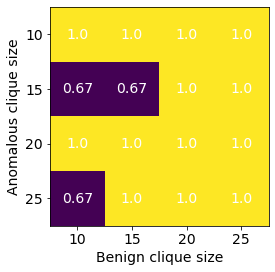

In [44]:
plot_heatmap([10, 15, 20, 25], avg_flags, 9)

# Reduce the injected anomaly edge weights to 1, 2 and 3. We can see the alg cannot distinguish amonalies only when the size of anomalous clique is 5

In [ ]:
# for i in range(0, 6):
avg_flags = []
for times in range(10):
    all_flags = []
    for benign_size in [5, 10, 15, 20, 25]:
        part_flags = []
    #     benign_size in [] = 22-2*i
        for malici_size in [5, 10, 15, 20, 25]:
    #     malici_size = 4+4*i
            print('Normal clique size', benign_size, ', anomaly clique size:', malici_size)
            cliques = [list(range(i, i+benign_size)) for i in range(0, benign_size*6, benign_size)]
            cliques += [list(range(i, i+malici_size)) for i in range(benign_size*6, benign_size*6+malici_size*3, malici_size)]
#             print('anomaly start from', benign_size*6, 'to', benign_size*6+malici_size*3-1)
            intra_edges = []
            for i in range(6,9):
                intra_edges += link_intra(cliques[i], 1, i-5)
            for i in range(0,6):
                intra_edges += link_intra(cliques[i], 1, 0)
            inter_edges = []
            for i in range(len(cliques)):
                for j in range(i+1, len(cliques)):
                    inter_edges += link_inter(cliques[i], cliques[j], 0.1)

            edges = intra_edges+inter_edges

            node_chisquares = node_chisquare(intra_edges+inter_edges, benign_size*6+malici_size*3, benford)
#             plt.plot(node_chisquares)
#             plt.show()
            _ = several_peel_weighted(edges, node_chisquares, log=False)
#             print(_)
            temp_f = 0
            if max(max(_[0]), max(_[1]), max(_[2]))==benign_size*6+malici_size*3-1:
                if min(min(_[0]), min(_[1]), min(_[2]))==benign_size*6:
                    if len(_[0])==malici_size and len(_[0])==len(_[1]) and len(_[0])==len(_[2]):
                        temp_f = 1
            part_flags.append(temp_f)
        all_flags.append(part_flags)
    avg_flags.append(all_flags)


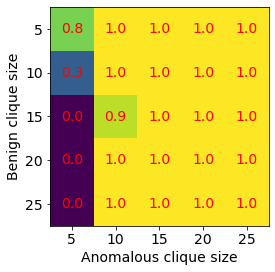

In [14]:
avg_flags = np.mean(np.array(avg_flags), axis=0)
plot_heatmap([5, 10, 15, 20, 25], avg_flags, 1)